In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("breast-cancer.csv")

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df[['radius_mean', 'texture_mean']].values
y = df['diagnosis'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


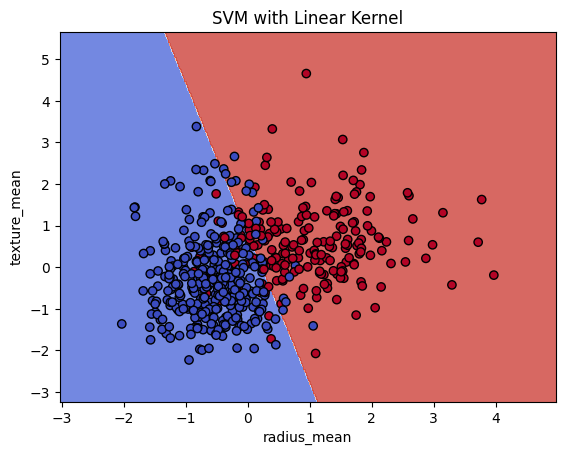

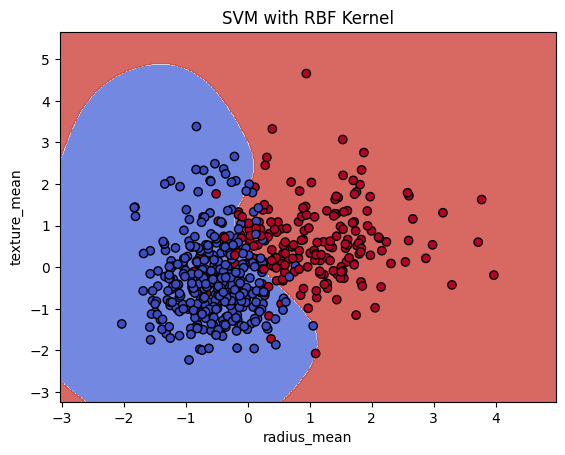

Best Parameters: {'C': 0.1, 'gamma': 'scale'}
Cross-Validation Accuracy: 90.34%


In [ ]:
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.title(title)
    plt.show()
plot_decision_boundary(svm_linear, X_scaled, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM with RBF Kernel")

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_scaled, y)
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-Validation Accuracy: %.2f%%" % (scores.mean() * 100))